In [24]:
#!/usr/bin/env python3
# coding=utf-8
#读取对应库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from fancyimpute import IterativeImputer as MICE

#读入表格数据
table = pd.read_csv("melb_data.csv",low_memory=False)
print("table shape:",table.shape)
random5=table.sample(5)
#查看数据样本
print('随机抽样5行数据：')
random5


table shape: (13580, 21)
随机抽样5行数据：


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
11744,Moonee Ponds,16/122 Maribyrnong Rd,1,u,362000.0,S,Brad,22/07/2017,6.2,3039.0,...,1.0,1.0,0.0,55.0,2015.0,Moonee Valley,-37.77149,144.91552,Western Metropolitan,6232.0
13326,Westmeadows,14 Parkhill Ct,2,h,560000.0,SP,YPA,23/09/2017,16.5,3049.0,...,2.0,2.0,424.0,NaN,NaN,NaN,-37.67909,144.87524,Northern Metropolitan,2474.0
5101,Reservoir,2/953 High St,2,h,555000.0,S,Nelson,11/02/2017,11.2,3073.0,...,1.0,2.0,229.0,92.0,1970.0,Darebin,-37.71000,145.00820,Northern Metropolitan,21650.0
3970,Maribyrnong,90 Blair St,3,h,460000.0,VB,Nelson,30/07/2016,8.7,3032.0,...,2.0,1.0,95.0,NaN,2001.0,Maribyrnong,-37.77200,144.88010,Western Metropolitan,4918.0
10839,Surrey Hills,1/17 Albert Cr,2,t,781000.0,S,Purplebricks,8/07/2017,10.2,3127.0,...,1.0,2.0,140.0,NaN,NaN,Whitehorse,-37.82413,145.10424,Southern Metropolitan,5457.0


In [25]:
#统计一丢失的数据有多少
missing_values_count = table.isnull().sum()
print(missing_values_count)
#丢失的数据的百分比
total_cells = np.product(table.shape)
total_missing = missing_values_count.sum()
print("丢失的数据百分比：",np.round(total_missing/total_cells*100,2),"%")

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64
丢失的数据百分比： 4.65 %


In [26]:
table_m_row = table.dropna()
print(table_m_row.head(10))
print('表格大小：',table_m_row.shape)

        Suburb              Address  Rooms Type      Price Method SellerG  \
1   Abbotsford      25 Bloomburg St      2    h  1035000.0      S  Biggin   
2   Abbotsford         5 Charles St      3    h  1465000.0     SP  Biggin   
4   Abbotsford          55a Park St      4    h  1600000.0     VB  Nelson   
6   Abbotsford         124 Yarra St      3    h  1876000.0      S  Nelson   
7   Abbotsford        98 Charles St      2    h  1636000.0      S  Nelson   
9   Abbotsford        10 Valiant St      2    h  1097000.0      S  Biggin   
11  Abbotsford      40 Nicholson St      3    h  1350000.0     VB  Nelson   
12  Abbotsford  123/56 Nicholson St      2    u   750000.0      S  Biggin   
15  Abbotsford        16 William St      2    h  1310000.0      S  Jellis   
16  Abbotsford          42 Henry St      3    h  1200000.0      S  Jellis   

          Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
1    4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0   
2    4/03/2017  

In [27]:
table_m_column = table.dropna(axis=1)
print(table_m_column.head(10))
print('表格大小：',table_m_column.shape)

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000.0      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000.0      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000.0      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  Postcode  Bedroom2  Bathroom  Landsize  Lattitude  \
0  3/12/2016       2.5    3067.0       2.0       1.0     202.0   -37.7996   
1  4/02/2016       2

In [28]:
table_f_0 = table.fillna(0)
print(table_f_0.head(10))
print('表格大小：',table_f_0.shape)

       Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford    40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford         55a Park St      4    h  1600000.0     VB  Nelson   
5  Abbotsford      129 Charles St      2    h   941000.0      S  Jellis   
6  Abbotsford        124 Yarra St      3    h  1876000.0      S  Nelson   
7  Abbotsford       98 Charles St      2    h  1636000.0      S  Nelson   
8  Abbotsford  6/241 Nicholson St      1    u   300000.0      S  Biggin   
9  Abbotsford       10 Valiant St      2    h  1097000.0      S  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           0.0   
1  4/02/2016  

In [29]:
table.fillna(method = 'ffill', axis=0).fillna(0).head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,0.0,0.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,150.0,1900.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,142.0,2014.0,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,107.0,1890.0,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [30]:
table.fillna(method = 'bfill', axis=0).fillna(0).head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,79.0,1900.0,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,142.0,2014.0,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0
5,Abbotsford,129 Charles St,2,h,941000.0,S,Jellis,7/05/2016,2.5,3067.0,...,1.0,0.0,181.0,210.0,1910.0,Yarra,-37.8041,144.9953,Northern Metropolitan,4019.0
6,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,2.0,0.0,245.0,210.0,1910.0,Yarra,-37.8024,144.9993,Northern Metropolitan,4019.0
7,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,1.0,2.0,256.0,107.0,1890.0,Yarra,-37.8060,144.9954,Northern Metropolitan,4019.0
8,Abbotsford,6/241 Nicholson St,1,u,300000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,1.0,0.0,75.0,1900.0,Yarra,-37.8008,144.9973,Northern Metropolitan,4019.0
9,Abbotsford,10 Valiant St,2,h,1097000.0,S,Biggin,8/10/2016,2.5,3067.0,...,1.0,2.0,220.0,75.0,1900.0,Yarra,-37.8010,144.9989,Northern Metropolitan,4019.0


In [31]:
table['Car'].fillna(table['Car'].mean()).head(5)

0    1.0
1    0.0
2    0.0
3    1.0
4    2.0
Name: Car, dtype: float64

In [32]:
use_columns = ['Price','Distance','Postcode','Bathroom','Car','BuildingArea']
table2 = table[use_columns]
print(table2.head(5))
table2_fit = pd.DataFrame(MICE().fit_transform(table2),columns=use_columns)
print(table2_fit.head(5))

       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  
0  3/12/2016  
1  4/02/2016  
2  4/03/2017  
3  4/03/2017  
4  4/06/2016  


ValueError: could not convert string to float: 'Abbotsford'

<AxesSubplot:title={'center':'Correlation of Features'}>

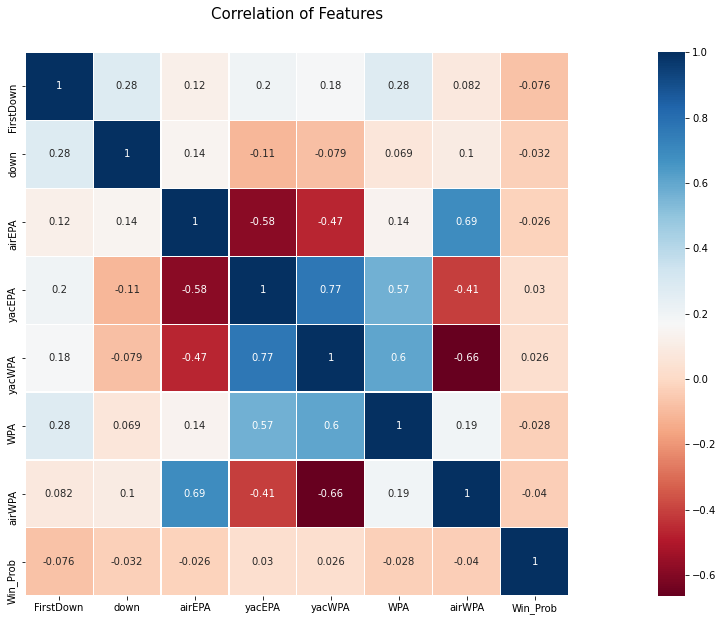

In [10]:
colormap = plt.cm.RdBu
plt.figure(figsize=(32,10))
plt.title('Correlation of Features', y=1.05, size=15)
sns.heatmap(table2.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [11]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score

# split dataset into inputs and outputs
X = table2_fit.values[:,1:5]
y = table2_fit.values[:,0].astype('int')
# evaluate an LDA model on the dataset using k-fold cross validation
model = LinearDiscriminantAnalysis()
kfold = KFold(n_splits=3)
result = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
model.fit(X,y)
print(model.predict(X)[:20])
print(y[:20])

[0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0]
[0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 0 0 0]
